# A Basic Weather Model made using RIDGE Regression

A simple weather model using Ridge regression. 

In [373]:
import sys
!{sys.executable} -m pip install xgboost

In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()

weather = pd.read_csv("Port of Spain.csv",index_col=0, encoding='latin1' )
weather.head(10)

,humidity,precipcover,windspeed,cloudcover,visibility,sunrise_time,sunset_time,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c
datetime,,,,,,,,,,,,,,,
2000-01-01,78.0,0.0,15.0,43.8,7.6,06:24:06,17:54:48,9.77900,31.1,22.1,26.7,34.7,22.1,28.2,22.2
2000-01-02,83.7,0.0,16.1,57.9,8.2,06:24:30,17:55:20,2.10185,31.1,21.8,25.7,35.6,21.8,26.9,22.5
2000-01-03,78.6,0.0,12.8,73.2,9.5,06:24:53,17:55:53,4.90220,32.1,23.1,26.3,35.0,23.1,27.3,22.0
2000-01-04,84.9,0.0,13.9,77.7,9.7,06:25:16,17:56:26,10.25525,29.1,21.8,24.5,32.1,21.8,25.1,21.6
2000-01-05,93.0,0.0,11.4,76.0,8.2,06:25:37,17:56:59,0.69850,27.3,22.8,24.5,30.4,22.8,24.7,23.3
2000-01-06,86.7,0.0,18.3,80.0,6.8,06:25:58,17:57:31,0.50165,31.1,23.1,25.5,35.6,23.1,26.5,23.0
2000-01-07,83.4,0.0,15.0,64.2,7.4,06:26:18,17:58:04,2.80035,30.8,23.1,25.2,33.8,23.1,25.8,21.9
2000-01-08,75.8,0.0,13.9,42.2,8.4,06:26:38,17:58:36,6.22300,31.1,22.7,26.5,33.8,22.7,27.6,21.4
2000-01-09,82.3,0.0,16.1,51.4,7.1,06:26:56,17:59:09,0.74930,31.1,22.1,25.8,35.2,22.1,27.4,22.4


In [375]:
weather.apply(pd.isnull).sum()

humidity                   0
precipcover                0
windspeed                  0
cloudcover                 0
visibility                 0
sunrise_time               0
sunset_time                0
Port of Spain precip mm    0
tempmax c                  0
tempmin c                  0
avgtemp c                  0
feelslikemax c             0
feelslikemin c             0
avgfeelsliketemp c         0
dewpoint c                 0
dtype: int64

In [376]:
weather.dtypes

humidity                   float64
precipcover                float64
windspeed                  float64
cloudcover                 float64
visibility                 float64
sunrise_time                object
sunset_time                 object
Port of Spain precip mm    float64
tempmax c                  float64
tempmin c                  float64
avgtemp c                  float64
feelslikemax c             float64
feelslikemin c             float64
avgfeelsliketemp c         float64
dewpoint c                 float64
dtype: object

In [377]:
weather.drop(columns=['sunrise_time'],inplace=True)
weather.drop(columns=['sunset_time'],inplace=True)
weather.dtypes

humidity                   float64
precipcover                float64
windspeed                  float64
cloudcover                 float64
visibility                 float64
Port of Spain precip mm    float64
tempmax c                  float64
tempmin c                  float64
avgtemp c                  float64
feelslikemax c             float64
feelslikemin c             float64
avgfeelsliketemp c         float64
dewpoint c                 float64
dtype: object

In [378]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
       '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
      dtype='object', name='datetime', length=7637)

In [379]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7637, freq=None)

<Axes: xlabel='datetime'>

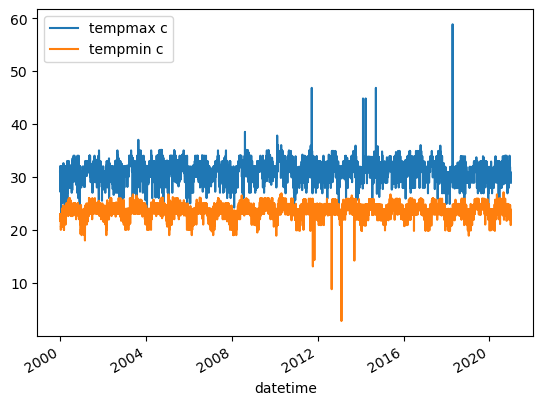

In [380]:
weather[["tempmax c", "tempmin c"]].plot()

In [381]:
weather.corr()

,humidity,precipcover,windspeed,cloudcover,visibility,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c
humidity,1.000000,0.100509,-0.267579,0.403003,-0.168968,0.430598,-0.507214,0.085850,-0.471877,0.007339,0.082644,-0.279969,0.671622
precipcover,0.100509,1.000000,0.033334,-0.110612,-0.278033,0.140316,-0.074204,0.080579,-0.050303,-0.010344,0.080394,-0.039125,0.073679
windspeed,-0.267579,0.033334,1.000000,-0.145946,-0.195514,-0.098371,-0.019695,0.015615,0.032140,-0.160260,0.017176,-0.041463,-0.244804
cloudcover,0.403003,-0.110612,-0.145946,1.000000,0.042818,0.192600,-0.186095,0.144597,-0.118827,0.020725,0.144035,-0.052623,0.327986
visibility,-0.168968,-0.278033,-0.195514,0.042818,1.000000,-0.183726,0.197347,-0.199505,0.077613,0.100209,-0.198207,0.086910,-0.122389
Port of Spain precip mm,0.430598,0.140316,-0.098371,0.192600,-0.183726,1.000000,-0.239710,0.039961,-0.229846,-0.044418,0.038813,-0.176618,0.257418
tempmax c,-0.507214,-0.074204,-0.019695,-0.186095,0.197347,-0.239710,1.000000,0.229982,0.755287,0.766281,0.229345,0.710167,0.073342
tempmin c,0.085850,0.080579,0.015615,0.144597,-0.199505,0.039961,0.229982,1.000000,0.632709,0.458156,0.997482,0.645936,0.632256
avgtemp c,-0.471877,-0.050303,0.032140,-0.118827,0.077613,-0.229846,0.755287,0.632709,1.000000,0.705803,0.631674,0.958910,0.331560
feelslikemax c,0.007339,-0.010344,-0.160260,0.020725,0.100209,-0.044418,0.766281,0.458156,0.705803,1.000000,0.455103,0.799594,0.595002


# Train Test Split

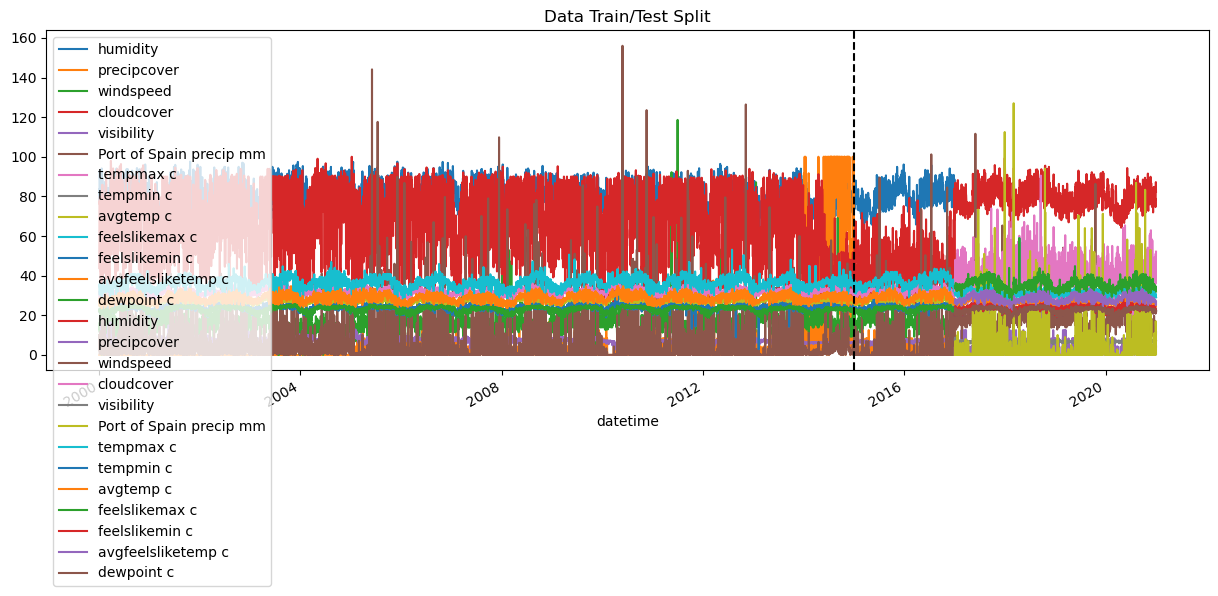

In [383]:
train = weather.loc[weather.index < '01-01-2017']
test = weather.loc[weather.index >= '01-01-2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
plt.show()

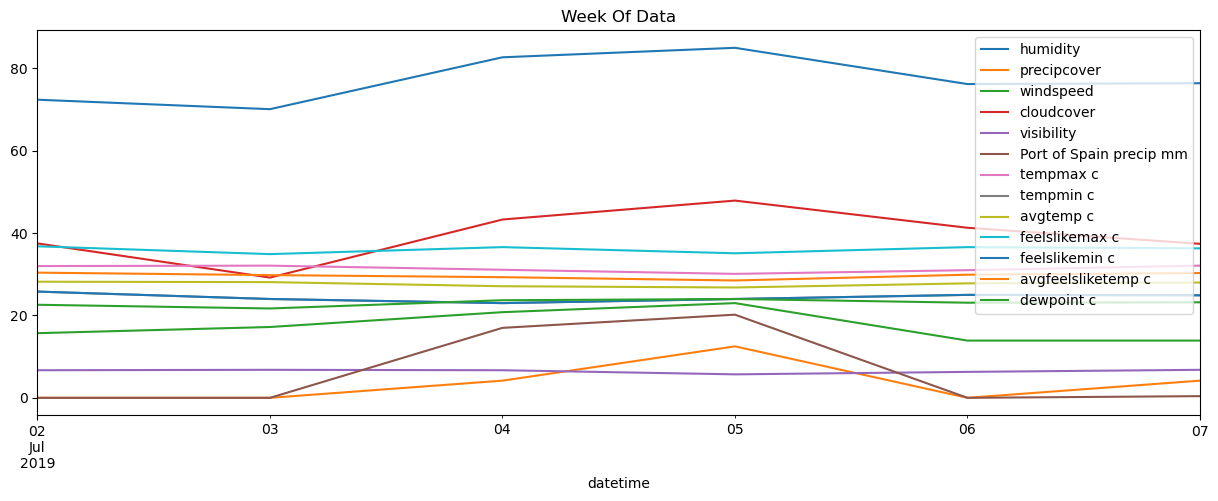

In [384]:
weather.loc[(weather.index > '07-01-2019') & (weather.index < '07-08-2019')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Create features 

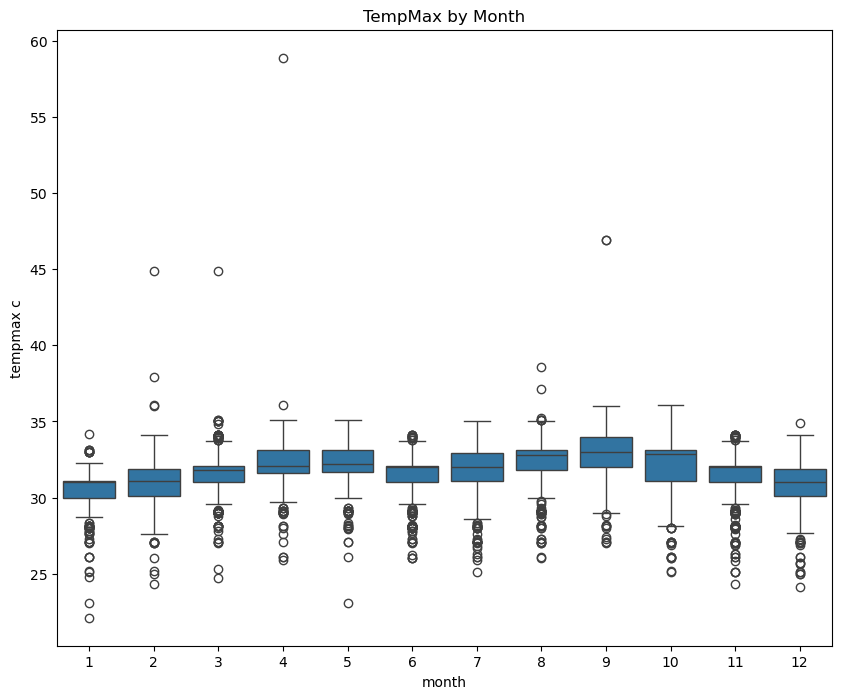

In [386]:
df = weather.copy()
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear
df['month'] = df.index.month
df['year'] = df.index.year

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='tempmax c')
ax.set_title('TempMax by Month')
plt.show()

<bound method Axes.set_title of <Axes: xlabel='month', ylabel='tempmin c'>>

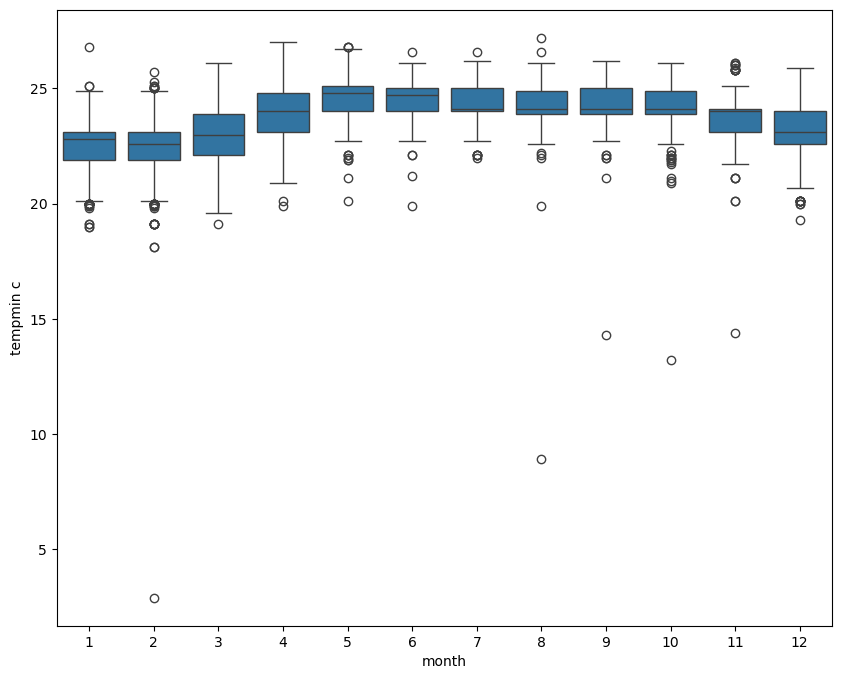

In [387]:
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['month'] = df.index.month
    df['year'] = df.index.year

    return df
df = create_features(weather)

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='tempmin c')
ax.set_title

In [388]:
df.head(10)

,humidity,precipcover,windspeed,cloudcover,visibility,Port of Spain precip mm,tempmax c,tempmin c,avgtemp c,feelslikemax c,feelslikemin c,avgfeelsliketemp c,dewpoint c,dayofweek,dayofyear,month,year
datetime,,,,,,,,,,,,,,,,,
2000-01-01,78.0,0.0,15.0,43.8,7.6,9.77900,31.1,22.1,26.7,34.7,22.1,28.2,22.2,5,1,1,2000
2000-01-02,83.7,0.0,16.1,57.9,8.2,2.10185,31.1,21.8,25.7,35.6,21.8,26.9,22.5,6,2,1,2000
2000-01-03,78.6,0.0,12.8,73.2,9.5,4.90220,32.1,23.1,26.3,35.0,23.1,27.3,22.0,0,3,1,2000
2000-01-04,84.9,0.0,13.9,77.7,9.7,10.25525,29.1,21.8,24.5,32.1,21.8,25.1,21.6,1,4,1,2000
2000-01-05,93.0,0.0,11.4,76.0,8.2,0.69850,27.3,22.8,24.5,30.4,22.8,24.7,23.3,2,5,1,2000
2000-01-06,86.7,0.0,18.3,80.0,6.8,0.50165,31.1,23.1,25.5,35.6,23.1,26.5,23.0,3,6,1,2000
2000-01-07,83.4,0.0,15.0,64.2,7.4,2.80035,30.8,23.1,25.2,33.8,23.1,25.8,21.9,4,7,1,2000
2000-01-08,75.8,0.0,13.9,42.2,8.4,6.22300,31.1,22.7,26.5,33.8,22.7,27.6,21.4,5,8,1,2000
2000-01-09,82.3,0.0,16.1,51.4,7.1,0.74930,31.1,22.1,25.8,35.2,22.1,27.4,22.4,6,9,1,2000


# Model 


In [390]:
train = create_features(train)
test = create_features(test)

target = ['tempmax c', 'tempmin c', 'avgtemp c', 'feelslikemax c','feelslikemin c','avgfeelsliketemp c', 'dewpoint c','humidity','precipcover','windspeed','cloudcover','visibility']
features = ['dayofweek','dayofyear','month','year']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [391]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:37.01458	validation_1-rmse:33.41745


C:\Users\cramd\anaconda3\Lib\site-packages\xgboost\callback.py:386: UserWarning: [18:27:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()


[100]	validation_0-rmse:14.46275	validation_1-rmse:12.39213
[200]	validation_0-rmse:7.27926	validation_1-rmse:5.30543
[300]	validation_0-rmse:5.61174	validation_1-rmse:3.68571
[400]	validation_0-rmse:5.30710	validation_1-rmse:3.60590
[417]	validation_0-rmse:5.28835	validation_1-rmse:3.61677


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

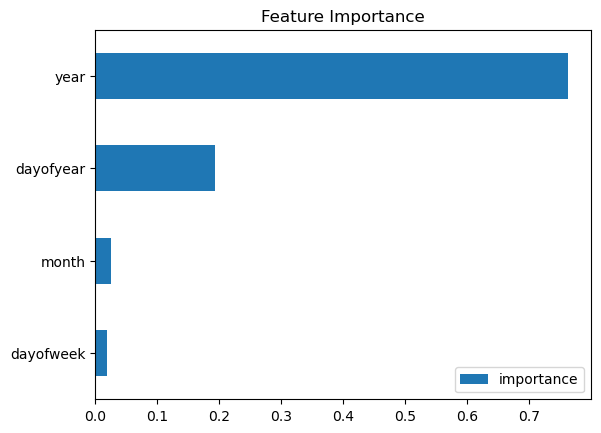

In [392]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [393]:
ptest = reg.predict(X_test)
ptest

array([[29.85229  , 22.19237  , 25.52223  , ..., 17.077932 , 41.02035  ,
         6.6035748],
       [29.903584 , 22.23853  , 25.52223  , ..., 17.065685 , 41.02035  ,
         6.6035748],
       [30.001139 , 22.239613 , 25.52223  , ..., 17.065685 , 41.02035  ,
         6.6035748],
       ...,
       [30.675232 , 22.813879 , 25.742409 , ..., 18.016006 , 51.88384  ,
         6.5195017],
       [30.675232 , 22.813879 , 25.703957 , ..., 18.016006 , 52.212658 ,
         6.5195017],
       [30.675232 , 22.813879 , 25.703957 , ..., 18.016006 , 52.212658 ,
         6.5195017]], dtype=float32)

In [425]:
# Evaluating the XGBoost model on the testing set

from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = reg.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(mae)
print(rmse)

1.9896150080248702
3.5887129371050115


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices